###Python Basic Programming Assignment 12


**1. In what modes should the PdfFileReader() and PdfFileWriter() File objects will be opened?**

PdfFileReader() needs to be opened in read-binary mode by passing 'rb' as the second argument to open().

PdfFileWriter() needs to be opened in write-binary mode with 'wb'.

In [2]:
!pip install PyPDF2

     |████████████████████████████████| 77 kB 2.9 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=0331eca30b467760f67972475975e4a0f510f8b83bc434029d5b94c72bfcf544
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [12]:
import PyPDF2

In [13]:
pdfFile = open("/content/Assignment4.pdf","rb")

In [14]:
pdfReader = PyPDF2.PdfFileReader(pdfFile)
type(pdfReader),print(pdfReader)

(PyPDF2.pdf.PdfFileReader, None)

In [15]:

file = PyPDF2.PdfFileWriter()

file.addBlankPage(
    width= 200,
    height= 200
)
file.addBlankPage(
    width=100,
    height=500
)

output = open('blankPdf.pdf', 'wb')
file.write(output)

In [17]:
pdfFile.close()


**2. From a PdfFileReader object, how do you get a Page object for page 5?**

We can get a Page object by calling the getPage() method on a PdfFileReader object and passing it the page number of the page we're interested in—in our case, 5.

In [25]:
pdfFile = open("/content/automate2e_SampleCh7.pdf","rb")
pdfReader = PyPDF2.PdfFileReader(pdfFile)
page = pdfReader.getPage(5)  #page index start with 0
print(page.extractText())
pdfFile.close()

166
   Chapter 7
Review of Regular Expression Matching
While there are several steps to using regular expressions in Python, each 
step is fairly simple.
1. Import the regex module with 
import re.2.
 Create a 
Regex object with the 
re.compile() function. (Remember to use 
a raw string.)
3.
 Pass the string you want to search into the 
Regex object™s 
search() method. This returns a 
Match object.
4.
 Call the 
Match object™s 
group() method to return a string of the actual 
matched text.
NOTE
 While I encourage you to enter the example code into the interactive shell, you 
should
 also make use of web-based regular expression testers, which can show you 
exactly how a regex matches a piece of text that you enter. I recommend the tester 
at
 https://pythex.org/
.More Pattern Matching with Regular Expressions
Now that you know the basic steps for creating and ˜nding regular expres
-sion objects using Python, you™re ready to try some of their more powerful 
pattern-matching capabilities

**3. What PdfFileReader variable stores the number of pages in the PDF document?**

The total number of pages in the document is stored in the numPages attribute of a PdfFileReader object.

In [27]:
pdfFile = open("/content/automate2e_SampleCh7.pdf","rb")
pdfReader = PyPDF2.PdfFileReader(pdfFile)
print(pdfReader.getNumPages())
pdfFile.close()

26


**4. If a PdfFileReader object’s PDF is encrypted with the password swordfish, what must you do before you can obtain Page objects from it?**

Decrypt method is use to decrpyt the password.

In [29]:
pdfFile = open("/content/automate2e_SampleCh7.pdf","rb")
pdfReader = PyPDF2.PdfFileReader(pdfFile)
pdfReader.isEncrypted  #PDF File is not encrypted

False

Let create an encrypted file first with password "swordfish"

In [30]:
pdfFile = open("/content/automate2e_SampleCh7.pdf","rb")
pdfReader = PyPDF2.PdfFileReader(pdfFile)

pdfWriter = PyPDF2.PdfFileWriter()
print("No of Pages:",pdfReader.numPages)
for pageNum in range(pdfReader.numPages):
  pdfWriter.addPage(pdfReader.getPage(pageNum))

pdfWriter.encrypt('swordfish') #encrpyting the new pdf file
newPdf = open('encrypted.pdf', 'wb') 
pdfWriter.write(newPdf)
newPdf.close()

No of Pages: 26


Check again, whethere new pdf generated is encrypted or not.

In [31]:
pdfFile = open("/content/encrypted.pdf","rb")
pdfReader = PyPDF2.PdfFileReader(pdfFile)
pdfReader.isEncrypted  #PDF File is not encrypted

True

Now, we will going to decrypt this file with password "swordfish"

In [33]:
pdfReader.decrypt('swordfish')
pageObj = pdfReader.getPage(0)
pageObj.extractText()

'7PATTERN MATCHING WITH \nREGULAR EXPRESSIONS\nYou may be familiar with searching for text \nby pressing \nCTRL\n-F and entering the words \nyou™re looking for. \nRegular expressions\n go one \nstep further: they allow you to specify a \npattern\n of \ntext to search for. You may not know a business™s exact \nphone number, but if you live in the United States or\nCanada, you know it will be three digits, followed by a hyphen, and then \nfour more digits (and optionally, a three-digit area code at the start). This \nis how you, as a human, know a phone number when you see it: 415-555-\n1234 is a phone number, but 4,155,551,234 is not. \nWe also recognize all sorts of other text patterns every day: email \naddresses have @ symbols in the middle, US social security numbers have \nnine digits and two hyphens, website URLs often have periods and forward \nslashes, news headlines use title case, social media hashtags begin with # \nand contain no spaces, and more.\n'

**5. What methods do you use to rotate a page?**

The pages of a PDF can also be rotated in 90-degree increments with the rotateClockwise() and rotateCounterClockwise() methods. Pass one of the integers 90, 180, or 270 to these methods.

In [35]:
pdfFile = open("/content/automate2e_SampleCh7.pdf","rb")
pdfReader = PyPDF2.PdfFileReader(pdfFile)
page = pdfReader.getPage(0)
page.rotateClockwise(90).extractText()

'7PATTERN MATCHING WITH \nREGULAR EXPRESSIONS\nYou may be familiar with searching for text \nby pressing \nCTRL\n-F and entering the words \nyou™re looking for. \nRegular expressions\n go one \nstep further: they allow you to specify a \npattern\n of \ntext to search for. You may not know a business™s exact \nphone number, but if you live in the United States or\nCanada, you know it will be three digits, followed by a hyphen, and then \nfour more digits (and optionally, a three-digit area code at the start). This \nis how you, as a human, know a phone number when you see it: 415-555-\n1234 is a phone number, but 4,155,551,234 is not. \nWe also recognize all sorts of other text patterns every day: email \naddresses have @ symbols in the middle, US social security numbers have \nnine digits and two hyphens, website URLs often have periods and forward \nslashes, news headlines use title case, social media hashtags begin with # \nand contain no spaces, and more.\n'

**6. What is the difference between a Run object and a Paragraph object?**

Compared to plaintext, .docx files have a lot of structure. This structure is represented by three different data types in Python-Docx. At the highest level, a Document object represents the entire document. The Document object contains a list of Paragraph objects for the paragraphs in the document. (A new paragraph begins whenever the user presses ENTER or RETURN while typing in a Word document.) Each of these Paragraph objects contains a list of one or more Run objects. The single-sentence paragraph in Figure has four runs.



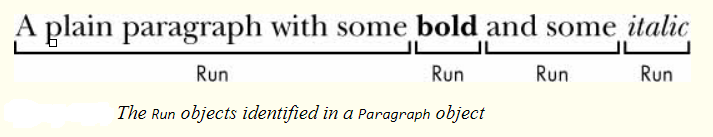

The text in a Word document is more than just a string. It has font, size, color, and other styling information associated with it. A style in Word is a collection of these attributes. A Run object is a contiguous run of text with the same style. A new Run object is needed whenever the text style changes.

But, we can manipulate these word documents in python using the python-docx module. Pip command to install this module is:


```
# This is formatted as code
pip install python-docx
```

Python docx module allows user to manipulate docs by either manipulating the existing one or creating a new empty document and manipulating it. It is a powerful tool as it helps you to manipulate the document to a very large extend.



**7. How do you obtain a list of Paragraph objects for a Document object that’s stored in a variable named doc?**

In [37]:
!pip install python-docx

     |████████████████████████████████| 5.6 MB 5.3 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184508 sha256=8d18f5887f3653b4b909aecf92128ca33288ee031c544ca0f9281638837866f4
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [39]:
import docx
doc=docx.Document("/content/Assignment_12.docx")
len(doc.paragraphs)

13

**8. What type of object has bold, underline, italic, strike, and outline variables?**

In [83]:
import docx
doc=docx.Document("/content/Assignment_12.docx")
len(doc.paragraphs)

13

In [84]:
for i in range(13):
  print(f"para[{i}] : {doc.paragraphs[i].text}")

para[0] : 1. In what modes should the PdfFileReader() and PdfFileWriter() File objects will be opened?
para[1] : 2. From a PdfFileReader object, how do you get a Page object for page 5?
para[2] : 3. What PdfFileReader variable stores the number of pages in the PDF document?
para[3] : 4. If a PdfFileReader object’s PDF is encrypted with the password swordfish, what must you do before you can obtain Page objects from it?
para[4] : 5. What methods do you use to rotate a page?
para[5] : 6. What is the difference between a Run object and a Paragraph object?
para[6] : 7. How do you obtain a list of Paragraph objects for a Document object that’s stored in a variable named doc?
para[7] : 8. What type of object has bold, underline, italic, strike, and outline variables?
para[8] : 9. What is the difference between False, True, and None for the bold variable?
para[9] : 10. How do you create a Document object for a new Word document?
para[10] : 11. How do you add a paragraph with the text 'Hello, 

In [85]:
doc.paragraphs[7].text

'8. What type of object has bold, underline, italic, strike, and outline variables?'

In [86]:
len(doc.paragraphs[7].runs)

11

In [87]:
###Checking bold, underline and italic for each run
for i in range(10):
  print(f"run[{i}] : {doc.paragraphs[7].runs[i].text} \nBold : {doc.paragraphs[7].runs[i].bold} Italic : {doc.paragraphs[7].runs[i].italic} underline : {doc.paragraphs[7].runs[i].underline}\n")

run[0] : 8. What type of object has  
Bold : None Italic : None underline : None

run[1] : bo 
Bold : True Italic : None underline : None

run[2] : ld 
Bold : None Italic : None underline : None

run[3] : ,  
Bold : None Italic : None underline : None

run[4] : underline 
Bold : None Italic : None underline : True

run[5] : ,  
Bold : None Italic : None underline : None

run[6] : italic 
Bold : None Italic : True underline : None

run[7] : ,  
Bold : None Italic : None underline : None

run[8] : strike 
Bold : None Italic : None underline : None

run[9] : , and outli 
Bold : None Italic : None underline : None



In [88]:
####To get the strike
doc.paragraphs[7].runs[7].font.strike

In [94]:
####To get the outline
doc.paragraphs[7].runs[7].font.outline

**9. What is the difference between False, True, and None for the bold variable?**

To set the text to bold we have to set it True.

False and None is to set text other than bold.
By default, if text is not bold then it returns None.



In [97]:
import docx

# Create an instance of a word document
doc = docx.Document()

# Add a Title to the document
doc.add_heading('Heading', 0)

# Creating paragraph with some content
para = doc.add_paragraph(
	'''It is a paragraph.''')

# Adding more content to paragraph and Setting bold to true
para.add_run(
	''' It contains well written, well thought and well-explained ''').bold = True ###set the bold to True

# Adding more content to paragraph
para.add_run('''computer science and programming articles, quizzes etc.''').bold=False

# Adding more content to paragraph
para.add_run(''' This is the last line.''').bold=None

# Now save the document to a location
doc.save('test.docx')


output:

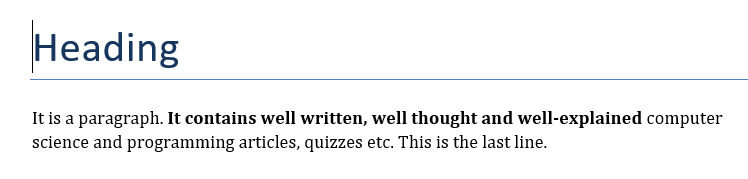

In [105]:
for i in range(4):
  print(doc.paragraphs[1].runs[i].bold)

None
True
False
None


**10. How do you create a Document object for a new Word document?**

by creating instance of Document

In [106]:
import docx

# Create an instance of a word document
doc = docx.Document()

# Add a Title to the document
doc.add_heading('Heading', 0)

# Creating paragraph with some content
para = doc.add_paragraph('''It is a paragraph.''')

# Now save the document to a location
doc.save('test.docx')

**11. How do you add a paragraph with the text 'Hello, there!' to a Document object stored in a variable named doc?**

In [107]:
import docx

# Create an instance of a word document
doc = docx.Document()

# Add a Title to the document
doc.add_heading('Heading', 0)

# Creating paragraph with some content
para = doc.add_paragraph('''It is a paragraph.''')

para = doc.add_paragraph('''Hello, there!''')  ###Added the paragraph as per the question

# Now save the document to a location
doc.save('test.docx')

**12. What integers represent the levels of headings available in Word documents?**

In [108]:
import docx

# Create an instance of a word document
doc = docx.Document()

help(doc.add_heading)

Help on method add_heading in module docx.document:

add_heading(text='', level=1) method of docx.document.Document instance
    Return a heading paragraph newly added to the end of the document.
    
    The heading paragraph will contain *text* and have its paragraph style
    determined by *level*. If *level* is 0, the style is set to `Title`. If *level*
    is 1 (or omitted), `Heading 1` is used. Otherwise the style is set to `Heading
    {level}`. Raises |ValueError| if *level* is outside the range 0-9.



When the level is set to 0, the string is printed as the title of the document. For all other values it prints a heading. The size of heading decreases as the level increases. If no level is set, by default its value is always 1.
Level should be in range of 0-9 else it will throw error.

In [111]:
import docx
  
# Create an instance of a word document
doc = docx.Document()
  
# Add a heading of level 0 (Also called Title)
doc.add_heading('Title for the document', 0)
  
# Add a heading of level 1
doc.add_heading('Heading level 1', 1)
  
# Add a heading of level 2
doc.add_heading('Heading level 2', 2)
  
# Add a heading of level 3
doc.add_heading('Heading level 3', 3)
  
# Add a heading of level 4
doc.add_heading('Heading level 4', 4)
  
# Add a heading of level 5
doc.add_heading('Heading level 5', 5)
  
# Add a heading of level 6
doc.add_heading('Heading level 6', 6)
  
# Add a heading of level 7
doc.add_heading('Heading level 7', 7)
  
# Add a heading of level 8
doc.add_heading('Heading level 8', 8)
  
# Add a heading of level 9
doc.add_heading('Heading level 9', 9)

# Now save the document to a location
doc.save('test1.docx')


Output:

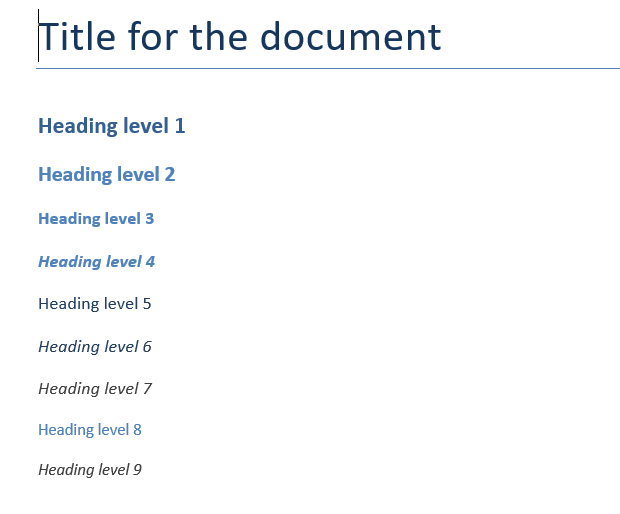